<h1><center><font size=10>Good Cardio Fitness Project</center></font></h1>

### **Context**
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. A treadmill is a device generally used for walking, running, or climbing while staying in the same place. It can be purchased and placed at home or can be accessed in most GYMs. Today most advanced Treadmills offer very advanced subscription to their users in order to get them to purhcase while interacting with interactive apps built around the treadmills. Regardless of how advanced Treadmills are in tech sorrounding them, they are popular amongst all age groups, especially the young. Lets explore that assumtpion further by applying various other factors and categories to it based on the data we have.

### **Data Description:**
* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

### **Importing the necessary packages**

In [45]:
# For reading and manipulating data
import pandas as pd
import numpy as np 
# Libraries used data visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# Command to tell Python to actually display the graphs
%matplotlib inline

pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places



### **Reading the DataSet**

In [46]:
df=pd.read_csv("https://raw.githubusercontent.com/miricoder/projects/main/datasets/CardioGoodFitness.csv")

### **Data Overview and Sanity Check**

#### **Displaying the first few rows of the dataset**

In [47]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


* The Dataset has been properly loaded
* Product Column displays the categories of different Treadmill brands
* Gender Column is categorized into Males and Females
* MaritalStatus Column is categorized into Singe and Partnered individuals 

#### **Checking the shape of the dataset**

In [48]:
df.shape

(180, 9)

* There're 180 Rows and 9 columns in our DataSet

####**Checking the data types of the columns for the dataset**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* There're 3 Objects Data Types
* There're 6 Numerical Data Types

####**Checking statistical summary of the Data**

In [50]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.00,NaN,NaN,NaN,28.79,6.94,18.00,24.00,26.00,33.00,50.00
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.00,NaN,NaN,NaN,15.57,1.62,12.00,14.00,16.00,16.00,21.00
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.00,NaN,NaN,NaN,3.46,1.08,2.00,3.00,3.00,4.00,7.00
Fitness,180.00,NaN,NaN,NaN,3.31,0.96,1.00,3.00,3.00,4.00,5.00
Income,180.00,NaN,NaN,NaN,53719.58,16506.68,29562.00,44058.75,50596.50,58668.00,104581.00
Miles,180.00,NaN,NaN,NaN,103.19,51.86,21.00,66.00,94.00,114.75,360.00


In [51]:
# Printing the most popular product as well as all unique categories of products
unique_products=df['Product'].unique()
mostUsed_product=df['Product'].mode()
print("Unique product list -- " ,unique_products)
print("-----------------------------------------------------")
print("Most popular Product amongst the products -- " ,mostUsed_product)

Unique product list --  ['TM195' 'TM498' 'TM798']
-----------------------------------------------------
Most popular Product amongst the products --  0    TM195
dtype: object


* There're 3 unique product categories with TM195 being most use or Top product 
* Mean(Average) age of users is close to 29 while age range is between 18 and 50 years old 
* Less than `75%` of user are `33 years` old where are less than `50%` of users are in their `mid 20's`
* The standard deviation for age also big 
* There're 2 unique genders in the Data Set and 2 unique MaritalStatus's 
* Mean Education is 15.57 which is approx. 16 years of age, where education years range between `12 and 21`.
* Median education and less than `75%` of education years is 16
    Question Ask Instructor what does this mean? 
* Mean usage is 3.46 approx. 4 while less than `75%` of the usage is 4, where max usage is 7
* Fitness Mean is 3.31 approx. 4 while less than 75% of the fitness level is also 4 here where max fitness level is at 5
* Income mean is `53719.58` and it ranges between 29.5K and 104.5K with big standard deviation of `16.5K`
 - Median income of users is `50596.50` where less than `75%` makes more than `58K` and less than `25%` makes `44K`
* Mean miles exepected to run by customer is `103`, where the range is between `21` and 360miles per week, with big standard deviation 
 - Less than `75%` of users expect to run `144miles` where median expectation is set at `94Miles`.

#### **Missing Value Treatment**

In [52]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* The dataset contains no missing values

### **Exploritary Data Analysis**

#### **`Rusable Method for Histplot and boxplot`**

In [53]:
def hist_box(data, feature, figsize=(10,5), kde=True, bins=None):
    """
    Boxplot and Histogram combined within the same graph page 
    in order to make comparison and analysis more efficient 
    
    data: dataframe
    feature: dataframe column 
    figsize: size of the figures (default (10,5))
    kde: whether to show the density curve (values set by user during usage - Boolean)
    bins: number of bins for histogram (default None)
"""
    #f2 holds are graph withax_box2 and ax_hist2 params
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, #Number of rows of subplot grid=2
        sharex=True, #x-axis will be shared among all subplots 
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)
    
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet") 
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

#### **`Rusable Method for Calculating A five-number summary values - printing most important ones `**

In [200]:
def five_number_summary(column_name):
    """
    column_name: name of the column that should be searched and stats described for
    """
    _25p=df[column_name].quantile(.75) 
    _median=df[column_name].median()
    _mean=df[column_name].mean()
    _75p=df[column_name].quantile(.75)
    std=df[column_name].std()
    print("25%",_25p,"\n" "Mean-Green", _mean,"\n" "Median-Boxplot"
          , _median,"\n" "75%",_75p,"\n","StandarD",std,"\n")
   

#### *Univariate Analysis - Numerical Variables*  

In [248]:
# Printing Data Types in order to not to scroll up all the way each time
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

##### **Observations on Age Column**

********************
25% 33.0 
Mean-Green 28.788888888888888 
Median-Boxplot 26.0 
75% 33.0 
 StandarD 6.943498135399795 

********************


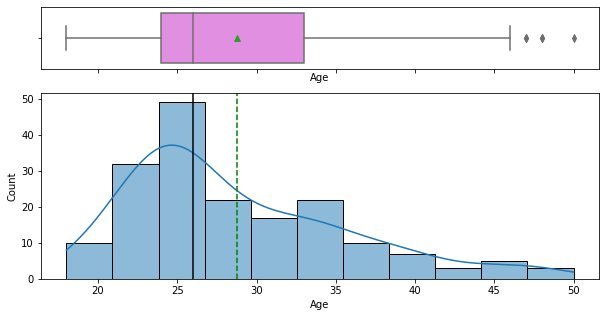

In [202]:
#Calling the reusable method hist_box() for graphing 
print("********************")
five_number_summary('Age')
print("********************")
#Callin the five_number_summary() for getting some of the 5 number summary stats
hist_box(df,'Age')


* Distribution of Age is highly right skewed
* Mean is greater than the median and closer to the 75% percentile which explains the right skeweness in the distribution 
* Youngest users falls below 75% where less than 50% contains the youngest users 
* Top user age is 25
* There're lesser and lesser users as Age increases above 26
* There is a high standar deviation as we can also from the box plot where range is quite large

In [203]:
# How many users do we have over 33 Years old
df[df['Age'] > 33].value_counts().sum()/180*100


23.333333333333332

* Almost 24% of Users are above the age of 33 which is over 75% and which our outliers are consisted of

#### **Observations on Education Column**

*******************
25% 16.0 
Mean-Green 15.572222222222223 
Median-Boxplot 16.0 
75% 16.0 
 StandarD 1.6170548978065569 

********************


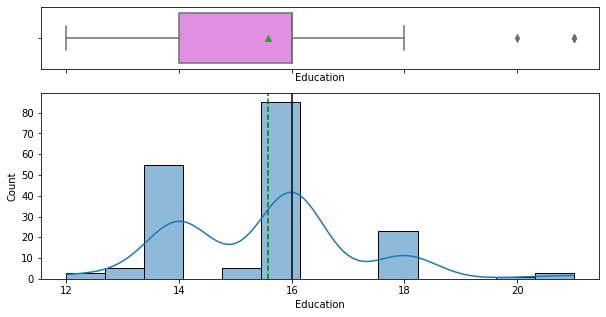

In [230]:
#Calling the reusable method hist_box() for graphing 
hist_box(df,'Education')

#Callin the five_number_summary() for getting some of the 5 number summary stats
print("*******************")
five_number_summary('Education')
print("********************")

* There're two main education Groups, 16 Years and 14 Years of education
* Outliers are on the rigt side, meaning there're some folks have higher than 16 years of education. 
 - We can also see that in the hist graph where it gets skewed a little as it goes beyond 18 years of education

In [224]:
# Since Mean, is very close to the median and 75% which are the same carrying out below calc
print("*******************")
# What is the percentage of users with  16 Years of education 
equalto_16_p  = df[df['Education'] == 16].value_counts().sum()/df.shape[0]*100
print("Percentage of Education 16 Years of Education:  ", round(equalto_16_p), '%')

# What is the percentage of users with  14 Years of education 
equalto_16_p  = df[df['Education'] == 14].value_counts().sum()/df.shape[0]*100
print("Percentage of Education 14 Years of Education:  ", round(equalto_16_p), '%')
print("********************")

*******************
Percentage of Education 16 Years of Education:   47 %
Percentage of Education 14 Years of Education:   31 %
********************


* Ther're 2 highest education years 14 and 16 (Education years can be split into 14 and 16)
* `79%` percent of users Education years falls between 14 and 16, 16 being the highest  

#### **Observations on Usage Column**

*******************
25% 4.0 
Mean-Green 3.4555555555555557 
Median-Boxplot 3.0 
75% 4.0 
 StandarD 1.0847970343962436 

********************


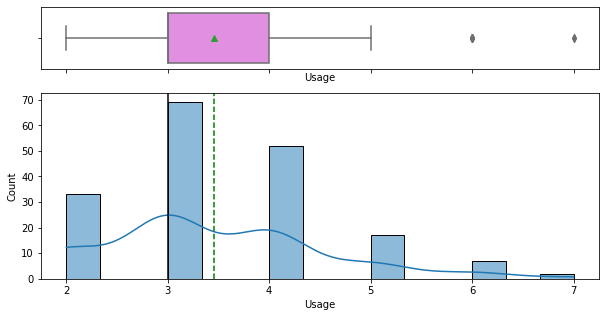

In [225]:
#Calling the reusable method hist_box() for graphing 
hist_box(df,'Usage')

#Callin the five_number_summary() for getting some of the 5 number summary stats
print("*******************")
five_number_summary('Usage')
print("********************")

* Equipment is more frequently used 3 or 4 times per week
* Outliers are on the rigt side, meaning there're some folks who are using the equipment more than 5 times per week. 
 - We can also see that in the hist graph where it gets skewed a little as it goes beyond 5 times per week usage
* Mean is very close to 75% which also explains the outliers we are seeing 

In [236]:
print("*******************")
equalto_3_c  = df[df['Usage'] == 3].value_counts().sum() # Count
equalto_3_p  = df[df['Usage'] == 3].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Frequency of equipment being used  3times perWeek:  ", equalto_3_c)
print("Percentage of equipment being used 3times perWeek:  ", round(equalto_3_p), '%')
print("-- -- -- -- -- -- -- -- -- -- --")
# What is the percentage of users with  14 Years of education 
equalto_4_c  = df[df['Usage'] == 4].value_counts().sum() # Count
equalto_4_p  = df[df['Usage'] == 4].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Frequency of equipment being used  4times perWeek:  ", equalto_4_c)
print("Percentage of equipment being used 4times perWeek:  ", round(equalto_4_p), '%')
print("********************")

*******************
Frequency of equipment being used  3times perWeek:   69
Percentage of equipment being used 3times perWeek:   38 %
-- -- -- -- -- -- -- -- -- -- --
Frequency of equipment being used  4times perWeek:   52
Percentage of equipment being used 4times perWeek:   29 %
********************


* The equipment is used more frequently between 3 or 4 times per week, which is 67% of overall usage frequency 

#### **Observations on Fitness Column**

*******************
25% 4.0 
Mean-Green 3.311111111111111 
Median-Boxplot 3.0 
75% 4.0 
 StandarD 0.958868565619312 

********************


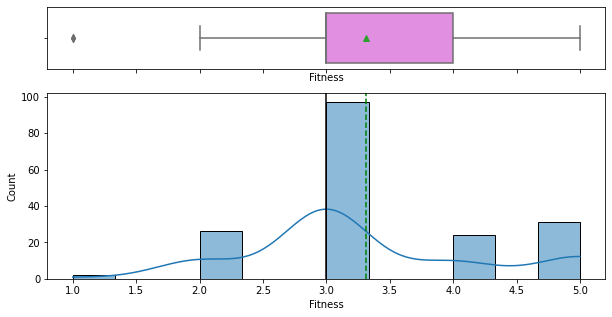

In [232]:
#Calling the reusable method hist_box() for graphing 
hist_box(df,'Fitness')

#Callin the five_number_summary() for getting some of the 5 number summary stats
print("*******************")
five_number_summary('Fitness')
print("********************")

In [259]:
print("*******************")
f_equalto_3_c  = df[df['Fitness'] == 3].value_counts().sum() # Count
f_equalto_3_p  = df[df['Fitness'] == 3].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of Fitness level at 3:  ", f_equalto_3_c)
print("Percentage of Fitness level at 3:  ", round(f_equalto_3_p), '%')
print("-- -- -- -- -- -- -- -- -- -- --")
f_lessthan_2_c  = df[df['Fitness'] < 2].value_counts().sum() # Count
f_lessthan_2_p  = df[df['Fitness'] < 2].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of fitness level less than 2:  ", f_lessthan_2_c)
print("Percentage of fitness level less than 2:  ", round(f_lessthan_2_p), '%')
print("*******************")

*******************
Count of Fitness level at 3:   97
Percentage of Fitness level at 3:   54 %
-- -- -- -- -- -- -- -- -- -- --
Count of fitness level less than 2:   2
Percentage of fitness level less than 2:   1 %
*******************


* Median and the highest self rated fitness level is at 3 
* There's a left skewedness as evident from Histogram 
* Outlier is also on the left side as the least fitness level is 1


#### **Observations on Income Column**

*******************
25% 58668.0 
Mean-Green 53719.57777777778 
Median-Boxplot 50596.5 
75% 58668.0 
 StandarD 16506.68422623862 

Max Income:  104581
********************


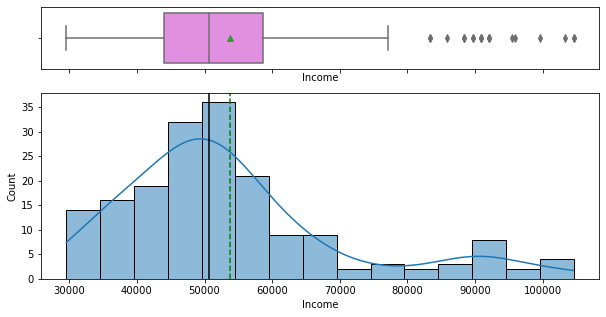

In [241]:
#Calling the reusable method hist_box() for graphing 
hist_box(df,'Income')

#Callin the five_number_summary() for getting some of the 5 number summary stats
print("*******************")
five_number_summary('Income')
print("Max Income: ", df['Income'].max())
print("********************")

* Mean and Median are close to the each other
* Most of the users earns between 50-53k
* Less than 25% of users makes 58K as do less than 75% of users. 
* However there are some individuals making over 70K and max of 104581K
   - There is high standart deviation 
* Distribution is highly right skewed as income increases & there're outliers

#### **Observations on Miles Column**

*******************
25% 114.75 
Mean-Green 103.19444444444444 
Median-Boxplot 94.0 
75% 114.75 
 StandarD 51.86360466180931 

Max Income:  360
********************


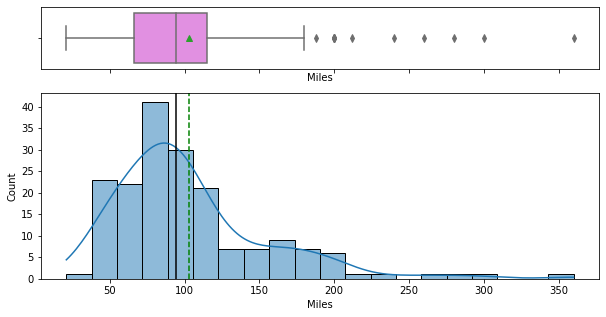

In [244]:
#Calling the reusable method hist_box() for graphing 
hist_box(df,'Miles')

#Callin the five_number_summary() for getting some of the 5 number summary stats
print("*******************")
five_number_summary('Miles')
print("Max Income: ", df['Miles'].max())
print("********************")

* Mean and Median is very far from Median but very close to 75%
* Distribution is right skewed
* There's a high standard deviation 
* There're outliers
* The highest customer expection in miles to run is under 100miles which less than 50%

#### *Univariate Analysis - Categorical Variables*  

#### **Observations on Product Column**

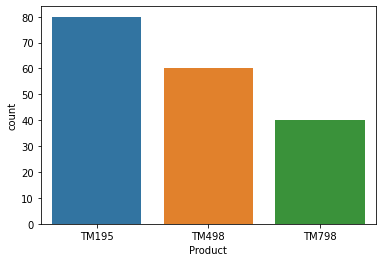

In [255]:
sns.countplot(data=df, x='Product');

* TM195 is more populat than TM498&TM798 models

#### **Observations on Gender Column**

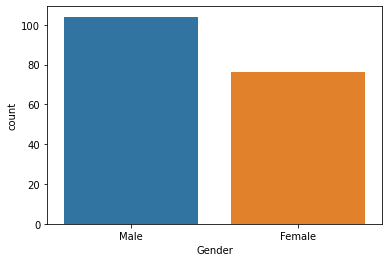

In [258]:
sns.countplot(data=df, x='Gender');

In [263]:
print("*******************")
gender_Gender_M_c  = df[df['Gender'] == 'Male'].value_counts().sum() # Count
gender_Gender_M_p  = df[df['Gender'] == 'Male'].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of Male Users:  ", gender_equalto_M_c)
print("Percentage of Male Users:  ", round(gender_equalto_M_p), '%')
print("-- -- -- -- -- -- -- -- -- -- --")
gender_Gender_F_c  = df[df['Gender'] == 'Female'].value_counts().sum() # Count
gender_Gender_F_p  = df[df['Gender'] == 'Female'].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of Female Users:  ", gender_equalto_F_c)
print("Percentage of Female Users:  ", round(gender_equalto_F_p), '%')
print("*******************")

*******************
Count of Male Users:   104
Percentage of Male Users:   58 %
-- -- -- -- -- -- -- -- -- -- --
Count of Female Users:   76
Percentage of Female Users:   42 %
*******************


* Most of the users are Male at `58%`  compared to females at `42%`

#### **Observations on MaritalStatus Column**

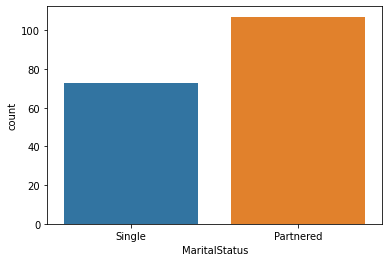

In [264]:
sns.countplot(data=df, x='MaritalStatus');

In [266]:
print("*******************")
gender_Single_c  = df[df['MaritalStatus'] == 'Single'].value_counts().sum() # Count
gender_Single_p  = df[df['MaritalStatus'] == 'Single'].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of Marital Status for Single:  ", gender_Single_c)
print("Percentage of Marital Status for Single:  ", round(gender_Single_p), '%')
print("-- -- -- -- -- -- -- -- -- -- --")
gender_Partnered_c  = df[df['MaritalStatus'] == 'Partnered'].value_counts().sum() # Count
gender_Partnered_p  = df[df['MaritalStatus'] == 'Partnered'].value_counts().sum()/df.shape[0]*100 # %Percentage
print("Count of Marital Status for Partnered:  ", gender_Partnered_c)
print("Percentage of Marital Status for Partnered:  ", round(gender_Partnered_p), '%')
print("*******************")

*******************
Count of Marital Status for Single:   73
Percentage of Marital Status for Single:   41 %
-- -- -- -- -- -- -- -- -- -- --
Count of Marital Status for Partnered:   107
Percentage of Marital Status for Partnered:   59 %
*******************


* `59%` of users are Partnered where as `41%` are Single. 

### **Bivariate Analysis**

`Checking the Relationship between different columns`